# GANs task (finally)

### Objective
In this task you'll use GANs to generate 'photorealistic' images on the dataset of collection of pokemon sprites obtained from
[pokemondb](https://pokemondb.net/sprites). Borrow the convolutional architecture from the deep convolutional GANs (DCGAN) introduced in
this [paper](https://arxiv.org/pdf/1511.06434).

For downloading the dataset use the following link:
~http://d2l-data.s3-accelerate.amazonaws.com/pokemon.zip~
https://drive.google.com/file/d/1LvXH0NLp-jwI2FVkl9HgH6urv64xA0Jq/view?usp=sharing
For your ease it is recommended to write a download and extract function in the code itself which will use this link to download the data.
### Rules
- The code should be in pytorch.
- Do not use libraries like labml, d2l, mxnet.
- Deadline 5th June EOD.

### Deliverables
- Notebook with all the code ofc.
- A writeup in markdown/latex:
	- With explanation of major points of the GANs & DCGANs.
	- The technicalities of your task like explaining the images, resizing, dimension changes in generator/discriminator networks etc.
	- Results of different experimentations you did.

### Additional
- The task is not that computationally expensive, can be done using the free tier T4 GPU of google colab.
- Following are the results from the code we wrote and trained on 20 epochs:
- EPOCH 1:
<p align="center">
  <img src="https://github.com/qu-bit1/style-swap/blob/master/week3/e1.png" />
</p>
- EPOCH 7:
<p align="center">
  <img src="https://github.com/qu-bit1/style-swap/blob/master/week3/e7.png" />
</p>
- EPOCH 20:
<p align="center">
  <img src="https://github.com/qu-bit1/style-swap/blob/master/week3/e20.png" />
</p>
- So don't worry if your code doesn't produce exactly 'photorealistic images', the only requirement of this task is
that you should be able to show that your model is learning, that's enough
 (or maybe run your code for more epochs or do whatever and show us some new pokemons lol).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/My\ Drive

 231001_Shvetang_A_1.ipynb		      pokemon
'Ai²TS-1_(XII)_QP, ANS & Soln-14-09-22.pdf'   pokemon.zip
'AM Form.gdoc'				      QuizQuestions.gdoc
'BOOK REVIEW : LORD EDGWARE DIES.gdoc'	     'Secretary Recruitment Tasks.gdoc'
'Colab Notebooks'			     'Summary of “The Peony Lantern”.gdoc'
 computer_software.gdoc			      Summer.gdoc
 dynamics.pdf				     'Test Results Summary.gsheet'
 hex.txt				     'Untitled project.gscript'
 Learning.gdoc				      UTIITSL_ePAN.pdf
'Mall Food Service.gdoc'		     'vvx-vzds-kxw - Dec 17, 2020.gjam'
'MOVIE REVIEW : DUNKIRK.gdoc'		     'Wildfires Analysis.gdoc'
'mth 111 notes.pdf'			      Wildfires.ipynb


In [ ]:
!gdown --id 1LvXH0NLp-jwI2FVkl9HgH6urv64xA0Jq -O /content/file.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1LvXH0NLp-jwI2FVkl9HgH6urv64xA0Jq
From (redirected): https://drive.google.com/uc?id=1LvXH0NLp-jwI2FVkl9HgH6urv64xA0Jq&confirm=t&uuid=bfac1b9e-4955-477d-96d7-d23654003671
To: /content/file.zip
100% 120M/120M [00:02<00:00, 46.1MB/s]


In [ ]:
import zipfile
import os

zip_file_path = '/content/file.zip'
extraction_path = '/content/extracted_files'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

pokemon=os.listdir(extraction_path)[0]

In [ ]:
print('File name :    ', os.path.basename(extraction_path))

File name :     extracted_files


In [ ]:
folders=os.listdir(f"/content/extracted_files/{pokemon}")
print(folders[:5])
print(len(folders))

['271', '575', '446', '561', '627']
721


In [ ]:
folder1=os.listdir(f"/content/extracted_files/{pokemon}/{folders[0]}")
print(folder1)

['271-22.png', '271-53.png', '271-9.png', '271-23.png', '271-17.png', '271-38.png', '271-37.png', '271-7.png', '271-47.png', '271-48.png', '271-4.png', '271-13.png', '271-36.png', '271-8.png', '271-11.png', '271-58.png', '271-33.png', '271-15.png', '271-31.png', '271-34.png', '271-18.png', '271-28.png', '271-10.png', '271-35.png', '271-50.png', '271-44.png', '271-57.png', '271-14.png', '271-30.png', '271-6.png', '271-41.png', '271-32.png', '271-29.png', '271-49.png', '271-19.png', '271-52.png', '271-43.png', '271-54.png', '271-3.png', '271-0.png', '271-24.png', '271-27.png', '271-1.png', '271-51.png', '271-12.png', '271-16.png', '271-45.png', '271-20.png', '271-25.png', '271-40.png', '271-5.png', '271-46.png', '271-2.png', '271-56.png', '271-42.png', '271-26.png', '271-21.png', '271-55.png', '271-39.png']


In [ ]:
import os
import shutil

for folder in folders:
  items = os.listdir(f"/content/extracted_files/{pokemon}/{folder}")
  for item in items:
    src_path = f"/content/extracted_files/{pokemon}/{folder}/{item}"
    dest_path = f"/content/extracted_files/{pokemon}/{item}"
    shutil.move(src_path, dest_path)
  os.rmdir(f"/content/extracted_files/{pokemon}/{folder}")
  print(f"Moved contents and deleted the folder: {folder}")

Moved contents and deleted the folder: 271
Moved contents and deleted the folder: 575
Moved contents and deleted the folder: 446
Moved contents and deleted the folder: 561
Moved contents and deleted the folder: 627
Moved contents and deleted the folder: 55
Moved contents and deleted the folder: 113
Moved contents and deleted the folder: 132
Moved contents and deleted the folder: 139
Moved contents and deleted the folder: 142
Moved contents and deleted the folder: 108
Moved contents and deleted the folder: 50
Moved contents and deleted the folder: 493
Moved contents and deleted the folder: 704
Moved contents and deleted the folder: 567
Moved contents and deleted the folder: 526
Moved contents and deleted the folder: 42
Moved contents and deleted the folder: 231
Moved contents and deleted the folder: 14
Moved contents and deleted the folder: 244
Moved contents and deleted the folder: 52
Moved contents and deleted the folder: 7
Moved contents and deleted the folder: 330
Moved contents and

In [ ]:
l=os.listdir(f"/content/extracted_files/{pokemon}")
print(len(l))

40597


In [ ]:
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as T
import torch.nn as nn
import torch
from torchvision.utils import make_grid
from tqdm.notebook import tqdm
import torch.nn.functional as F
from torchvision.utils import save_image
import matplotlib.pyplot as plt

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
image_size = 64
batch_size = 128
stats = (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)

train_ds = ImageFolder("/content/extracted_files", transform=T.Compose([
  T.Resize(image_size),
  T.CenterCrop(image_size),
  T.ToTensor(),
  T.Normalize(*stats)]))

train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
discriminator = nn.Sequential(
    # in: 3 x 64 x 64

    nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(64),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 64 x 32 x 32

    nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(128),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 128 x 16 x 16

    nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(256),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 256 x 8 x 8

    nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(512),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 512 x 4 x 4

    nn.Conv2d(512, 1, kernel_size=4, stride=1, padding=0, bias=False),
    # out: 1 x 1 x 1

    nn.Flatten(),
    nn.Sigmoid()).to(device)

In [ ]:
latent_size=128

In [ ]:
generator = nn.Sequential(
    # in: latent_size x 1 x 1

    nn.ConvTranspose2d(latent_size, 512, kernel_size=4, stride=1, padding=0, bias=False),
    nn.BatchNorm2d(512),
    nn.ReLU(True),
    # out: 512 x 4 x 4

    nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(256),
    nn.ReLU(True),
    # out: 256 x 8 x 8

    nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(128),
    nn.ReLU(True),
    # out: 128 x 16 x 16

    nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(64),
    nn.ReLU(True),
    # out: 64 x 32 x 32

    nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1, bias=False),
    nn.Tanh()
    # out: 3 x 64 x 64
).to(device)

In [ ]:
def denorm(img_tensors):
  return img_tensors * stats[1][0] + stats[0][0]

def show_images(images, nmax=64):
  fig, ax = plt.subplots(figsize=(8, 8))
  ax.set_xticks([]); ax.set_yticks([])
  ax.imshow(make_grid(denorm(images.detach()[:nmax]), nrow=8).permute(1, 2, 0))

In [ ]:
from torchvision.utils import save_image

sample_dir = "/content/generated"
os.makedirs(sample_dir, exist_ok=True)

def save_samples(index, latent_tensors, show=True):
    fake_images = generator(latent_tensors)
    fake_fname = 'generated-images-{0:0=4d}.png'.format(index)
    save_image(denorm(fake_images), os.path.join(sample_dir, fake_fname), nrow=8)
    print('Saving', fake_fname)
    if show:
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(fake_images.cpu().detach(), nrow=8).permute(1, 2, 0))

In [ ]:
def train_discriminator(real_images, opt_d):
  # Clear discriminator gradients
  opt_d.zero_grad()

  # Pass real images through discriminator
  real_preds = discriminator(real_images)
  real_targets = torch.ones(real_images.size(0), 1, device=device)
  real_loss = F.binary_cross_entropy(real_preds, real_targets)
  real_score = torch.mean(real_preds).item()

  # Generate fake images
  latent = torch.randn(batch_size, latent_size, 1, 1, device=device)
  fake_images = generator(latent)

  # Pass fake images through discriminator
  fake_targets = torch.zeros(fake_images.size(0), 1, device=device)
  fake_preds = discriminator(fake_images)
  fake_loss = F.binary_cross_entropy(fake_preds, fake_targets)
  fake_score = torch.mean(fake_preds).item()

  # Update discriminator weights
  loss = real_loss + fake_loss
  loss.backward()
  opt_d.step()
  return loss.item(), real_score, fake_score

In [ ]:
def train_generator(opt_g):
  # Clear generator gradients
  opt_g.zero_grad()

  # Generate fake images
  latent = torch.randn(batch_size, latent_size, 1, 1, device=device)
  fake_images = generator(latent)

  # Try to fool the discriminator
  preds = discriminator(fake_images)
  targets = torch.ones(batch_size, 1, device=device)
  loss = F.binary_cross_entropy(preds, targets)

  # Update generator weights
  loss.backward()
  opt_g.step()

  return loss.item()        # A scalar value that represents the loss which is actually in the form of a tensor

Saving generated-images-0000.png


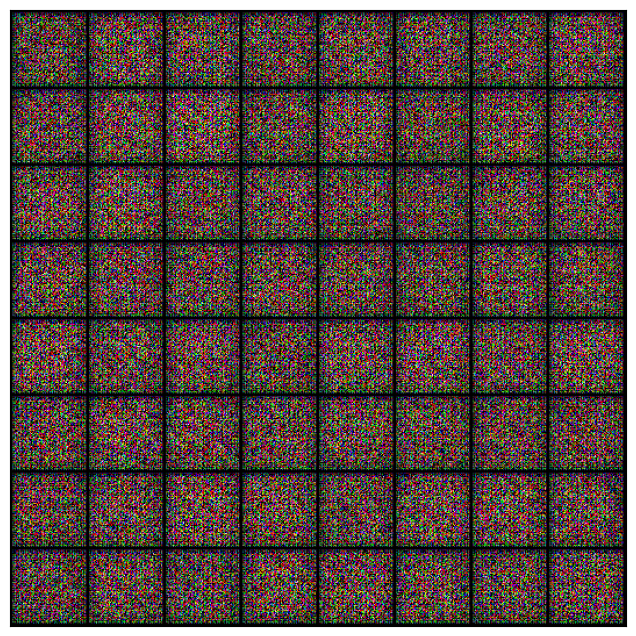

In [ ]:
fixed_latent = torch.randn(64, latent_size, 1, 1,device=device)

save_samples(0, fixed_latent)

In [ ]:
def fit(epochs, lr, start_idx=1):
  torch.cuda.empty_cache()

  # Losses & scores
  losses_g = []
  losses_d = []
  real_scores = []
  fake_scores = []

  # Create optimizers
  opt_d = torch.optim.SGD(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))
  opt_g = torch.optim.SGD(generator.parameters(), lr=lr, betas=(0.5, 0.999))

  for epoch in range(epochs):
    for real_images, _ in tqdm(train_dl):
      real_images = real_images.to(device)
      # Train discriminator
      loss_d, real_score, fake_score = train_discriminator(real_images, opt_d)
      # Train generator
      loss_g = train_generator(opt_g)

    # Record losses & scores
    losses_g.append(loss_g)
    losses_d.append(loss_d)
    real_scores.append(real_score)
    fake_scores.append(fake_score)

    # Log losses & scores (last batch)
    print("Epoch [{}/{}], loss_g: {:.4f}, loss_d: {:.4f}, real_score: {:.4f}, fake_score: {:.4f}".format(
        epoch+1, epochs, loss_g, loss_d, real_score, fake_score))

    # Save generated images
    save_samples(epoch+start_idx, fixed_latent, show=False)

  return losses_g, losses_d, real_scores, fake_scores

In [ ]:
epochs=20
lr=0.0002

In [ ]:
import warnings

warnings.filterwarnings('ignore')

metrics = fit(epochs,lr)

  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [1/20], loss_g: 4.9670, loss_d: 0.3738, real_score: 0.9379, fake_score: 0.2444
Saving generated-images-0001.png


  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [2/20], loss_g: 3.0401, loss_d: 0.1519, real_score: 0.9418, fake_score: 0.0776
Saving generated-images-0002.png


  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [3/20], loss_g: 2.8698, loss_d: 0.4843, real_score: 0.6601, fake_score: 0.0150
Saving generated-images-0003.png


  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [4/20], loss_g: 3.7333, loss_d: 0.1449, real_score: 0.9702, fake_score: 0.1016
Saving generated-images-0004.png


  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [5/20], loss_g: 3.9937, loss_d: 0.1046, real_score: 0.9644, fake_score: 0.0628
Saving generated-images-0005.png


  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [6/20], loss_g: 3.5032, loss_d: 0.1099, real_score: 0.9340, fake_score: 0.0348
Saving generated-images-0006.png


  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [7/20], loss_g: 3.7664, loss_d: 0.0850, real_score: 0.9712, fake_score: 0.0524
Saving generated-images-0007.png


  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [8/20], loss_g: 2.9056, loss_d: 0.1119, real_score: 0.9417, fake_score: 0.0474
Saving generated-images-0008.png


  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [9/20], loss_g: 5.0650, loss_d: 0.0466, real_score: 0.9856, fake_score: 0.0308
Saving generated-images-0009.png


  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [10/20], loss_g: 4.3672, loss_d: 0.1174, real_score: 0.9634, fake_score: 0.0674
Saving generated-images-0010.png


  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [11/20], loss_g: 4.6736, loss_d: 0.0641, real_score: 0.9681, fake_score: 0.0290
Saving generated-images-0011.png


  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [12/20], loss_g: 4.4423, loss_d: 0.0493, real_score: 0.9735, fake_score: 0.0213
Saving generated-images-0012.png


  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [13/20], loss_g: 4.2725, loss_d: 0.0423, real_score: 0.9739, fake_score: 0.0150
Saving generated-images-0013.png


  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [14/20], loss_g: 3.6640, loss_d: 0.0951, real_score: 0.9220, fake_score: 0.0107
Saving generated-images-0014.png


  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [15/20], loss_g: 2.3283, loss_d: 0.0624, real_score: 0.9472, fake_score: 0.0067
Saving generated-images-0015.png


  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [16/20], loss_g: 4.1936, loss_d: 0.0582, real_score: 0.9612, fake_score: 0.0171
Saving generated-images-0016.png


  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [17/20], loss_g: 1.6626, loss_d: 0.4999, real_score: 0.7316, fake_score: 0.0681
Saving generated-images-0017.png


  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [18/20], loss_g: 1.5213, loss_d: 0.1103, real_score: 0.9046, fake_score: 0.0062
Saving generated-images-0018.png


  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [19/20], loss_g: 4.1623, loss_d: 0.0505, real_score: 0.9652, fake_score: 0.0117
Saving generated-images-0019.png


  0%|          | 0/318 [00:00<?, ?it/s]

Epoch [20/20], loss_g: 5.9310, loss_d: 0.0165, real_score: 0.9905, fake_score: 0.0064
Saving generated-images-0020.png


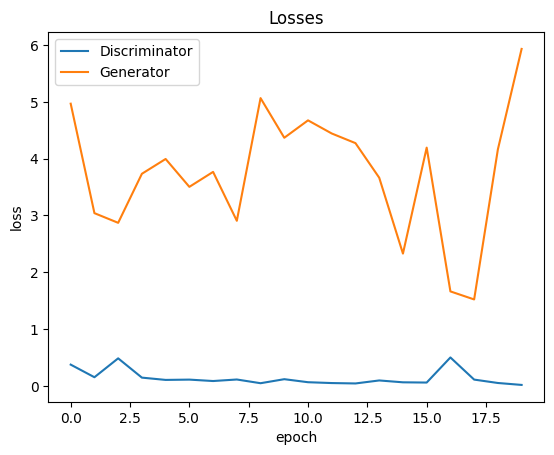

In [ ]:
plt.plot(metrics[1], '-')
plt.plot(metrics[0], '-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Discriminator', 'Generator'])
plt.title('Losses');

In [ ]:
from IPython.display import Image

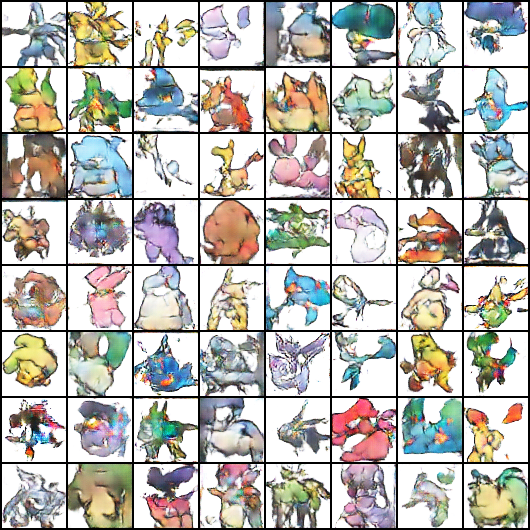

In [ ]:
Image("/content/generated/generated-images-0020.png")

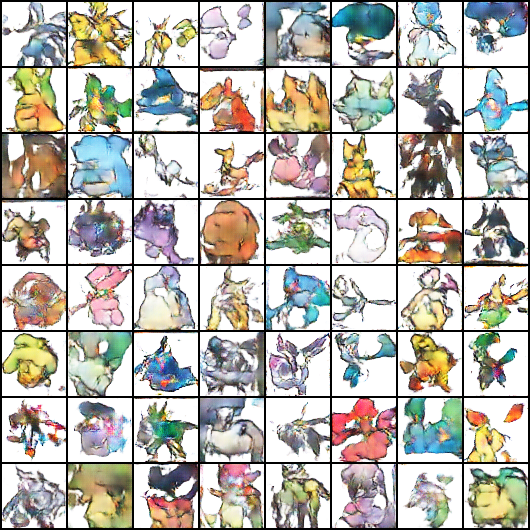

In [ ]:
Image("/content/generated/generated-images-0019.png")

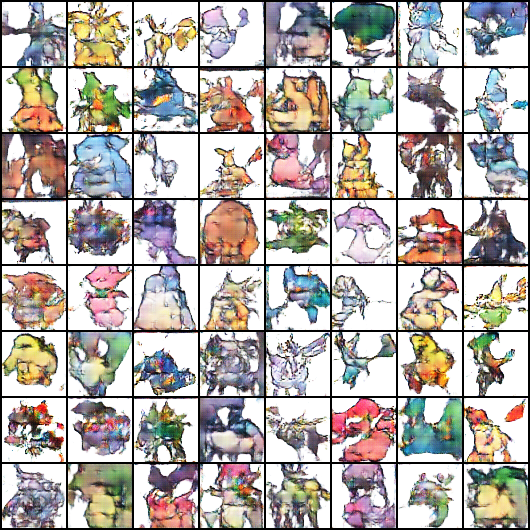

In [ ]:
Image("/content/generated/generated-images-0017.png")

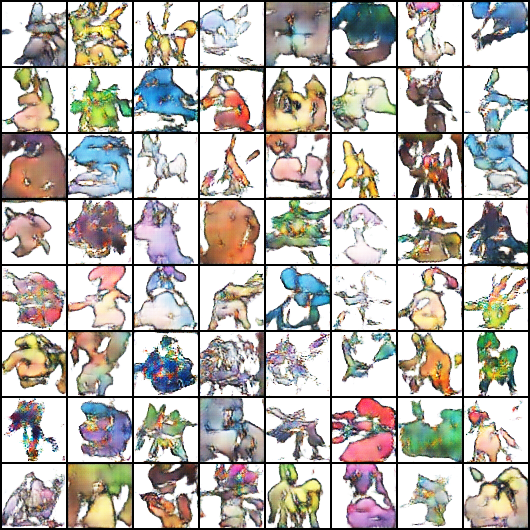

In [ ]:
Image("/content/generated/generated-images-0007.png")